In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Poojaineuron23/Food_delivery/main/Notebooks/Data/delivery.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [66]:
df["Restaurant_latitude"].unique()

array([30.327968, 10.003064, 18.56245 , 30.899584, 26.463504, 19.176269,
       12.311072, 18.592718, 17.426228, 22.552672, 18.563934, 23.357804,
       11.003669, 12.986047, 19.221315, 13.005801, 26.849596, 21.160522,
       12.934179, 18.51421 , 11.022477, 21.160437, 15.51315 , 15.561295,
        0.      , 18.55144 , 18.593481, 21.173343, 17.451976, 12.972532,
       13.064181, 19.121999, 21.149569, 19.091458, 22.539129, 12.970324,
       21.175975, 23.369746, 12.914264, 11.003681, 10.96185 , 27.165108,
       26.88842 , 26.913987, 12.3085  , 21.183434, 19.254567, 25.449659,
       30.372202, 12.972793, 21.157735, 21.186438, 12.935662, 17.431477,
       12.933298, 22.311358, 12.934365, 13.086438, 26.913483, 17.411028,
       18.516216, 15.5696  , 19.876428, 12.939496, 17.433809, 23.374878,
       27.163303, 22.74806 , 26.891191, 12.316967, 18.927584, 11.022298,
       12.325461, 18.530963, 17.458998, 19.1813  , 22.727021, 12.979166,
       18.994237, 12.284747, 11.000762, 26.479108, 

In [67]:
cols_to_clean=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"]

for col in cols_to_clean:
    df[col]=df[col].abs()

In [68]:
import logging 
import os
from datetime import datetime

LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"
logs_path=os.path.join(os.getcwd(),"logs",LOG_FILE)
os.makedirs(logs_path,exist_ok=True)

LOG_FILE_PATH=os.path.join(logs_path,LOG_FILE)

logging.basicConfig(
    filename=LOG_FILE_PATH,
    format="[ %(asctime)s ] %(lineno)d %(name)s - %(levelname)s - %(message)s",
    level=logging.INFO
)

In [69]:
import sys
from src.logger import logging

def error_message_detail(error,error_detail:sys):
    _,_,exc_tb = error_detail.exc_info()
    file_name = exc_tb.tb_frame.f_code.co_filename

    error_message = "Error occured in python script name [{0}] line number [{1}] error message [{2}]".format(
        file_name, exc_tb.tb_lineno, str(error)
    )

    return error_message

class CustomException(Exception):
    
    def __init__(self, error_message, error_detail:sys):
        super().__init__(error_message)
        self.error_message = error_message_detail(error_message, error_detail=error_detail)

    def __str__(self):
        return self.error_message    

In [7]:
import numpy as np
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    lat1=abs(lat1)
    lat2=abs(lat2)
    lon1=abs(lon1)
    lon2=abs(lon2)

    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])

In [70]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,time_diff
0,0xcdcd,DEHRES17DEL01,2.0,1.0,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,46,10.271464,12,2,2022,21.0,55.0,22.0,10.0,15.0
1,0xd987,KOCRES16DEL01,1.0,1.0,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,23,6.229376,13,2,2022,14.0,55.0,15.0,5.0,10.0
2,0x2784,PUNERES13DEL03,1.0,1.0,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,21,13.764306,4,3,2022,17.0,30.0,17.0,40.0,10.0
3,0xc8b6,LUDHRES15DEL02,2.0,1.0,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,20,2.927795,13,2,2022,9.0,20.0,9.0,30.0,10.0
4,0xdb64,KNPRES14DEL02,1.0,1.0,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,41,19.373484,14,2,2022,19.0,50.0,20.0,5.0,15.0


In [85]:
%pip install geopy
from geopy.distance import geodesic

# Calculate and store the distances in a new column 'distance'
for i in range(len(df)):
    df.loc[i, 'distance'] = geodesic((df.loc[i, 'Restaurant_latitude'], df.loc[i, 'Restaurant_longitude']),
                                     (df.loc[i, 'Delivery_location_latitude'], df.loc[i, 'Delivery_location_longitude'])).km

Note: you may need to restart the kernel to use updated packages.


<Axes: >

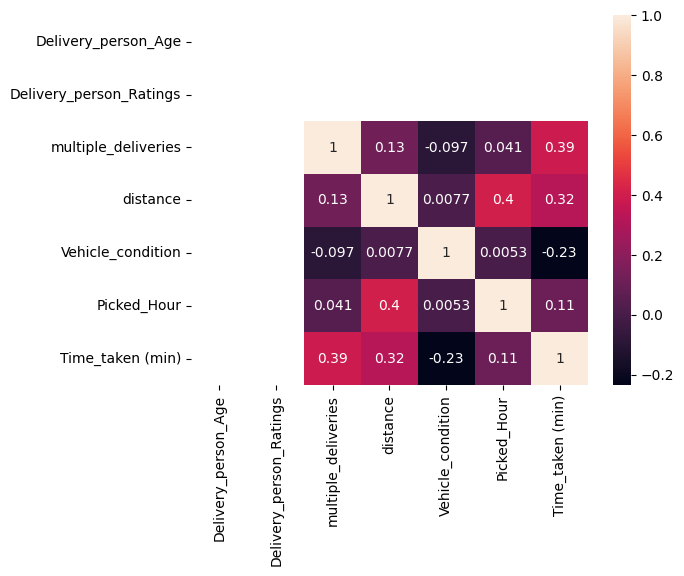

In [87]:
import numpy as np
import seaborn as sns
hm = pd.DataFrame(df, columns=["Delivery_person_Age","Delivery_person_Ratings","multiple_deliveries","distance","Vehicle_condition","Picked_Hour","Time_taken (min)"])
sns.heatmap(hm.corr(),annot=True)

In [88]:
df["distance"].unique()

array([10.27146402,  6.22937608, 13.76430593, ..., 11.70948344,
       20.0339288 , 19.80720633])

In [74]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],dayfirst=True)

df['day']=df['Order_Date'].dt.day
df['month']=df['Order_Date'].dt.month
df['year']=df['Order_Date'].dt.year



df['Order_Hour']=df['Time_Orderd'].str.split(':').str[0]
df['Order_Min']=df['Time_Orderd'].str.split(':').str[1]

df['Picked_Hour']=df['Time_Order_picked'].str.split(':').str[0]
df['Picked_Min']=df['Time_Order_picked'].str.split(':').str[1]


df['Order_Hour']=df['Order_Hour'].fillna(0)
df['Order_Min']=df['Order_Min'].fillna(0)
df['Picked_Hour']=df['Picked_Hour'].fillna(0)
df['Picked_Min']=df['Picked_Min'].fillna(0)



df['Order_Hour']=df['Order_Hour'].astype(float)
df['Order_Min']=df['Order_Min'].astype(float)
df['Picked_Hour']=df['Picked_Hour'].astype(float)
df['Picked_Min']=df['Picked_Min'].astype(float)

In [75]:
for i in df['Delivery_person_Age']:
    if i<30 :
        df['Delivery_person_Age']=df['Delivery_person_Age'].replace(i,1)
    else:
        df['Delivery_person_Age']=df['Delivery_person_Age'].replace(i,2)

In [76]:
for i in df['Delivery_person_Ratings']:
    if i<4.0 :
        df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].replace(i,'2')
        
    
    elif i>=4.0:
        df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].replace(i,'1')


In [77]:
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype(float)

In [78]:
df['time_diff']=(df['Picked_Hour']*60+df['Picked_Min'])-(df['Order_Hour']*60+df['Order_Min'])

In [79]:
import numpy as np
for i in df['time_diff']:
    if i<0 or i>120 or i.is_integer()==False:
        df['time_diff']=df['time_diff'].replace(i,np.nan)

In [80]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,time_diff
0,0xcdcd,DEHRES17DEL01,1.0,2.0,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,46,10.271464,12,2,2022,21.0,55.0,22.0,10.0,15.0
1,0xd987,KOCRES16DEL01,1.0,2.0,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,23,6.229376,13,2,2022,14.0,55.0,15.0,5.0,10.0
2,0x2784,PUNERES13DEL03,1.0,2.0,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,21,13.764306,4,3,2022,17.0,30.0,17.0,40.0,10.0
3,0xc8b6,LUDHRES15DEL02,1.0,2.0,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,20,2.927795,13,2,2022,9.0,20.0,9.0,30.0,10.0
4,0xdb64,KNPRES14DEL02,1.0,2.0,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,41,19.373484,14,2,2022,19.0,50.0,20.0,5.0,15.0


In [19]:
df['time_diff'].unique()

array([15., 10.,  5., nan, 30., 45., 60.])

In [20]:
df.groupby(by="distance")["Time_taken (min)"].median()

distance
1.463837     16.0
1.463891     18.0
1.463908     27.0
1.463927     19.5
1.463929     22.5
             ... 
20.942420    31.5
20.942421    32.0
20.942455    34.0
20.942471    20.0
20.942906    26.0
Name: Time_taken (min), Length: 4373, dtype: float64

In [21]:
df['time_diff'].unique()

array([15., 10.,  5., nan, 30., 45., 60.])

In [81]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'distance', 'day', 'month', 'year', 'Order_Hour',
       'Order_Min', 'Picked_Hour', 'Picked_Min', 'time_diff'],
      dtype='object')


In [82]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,time_diff
0,0xcdcd,DEHRES17DEL01,1.0,2.0,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,46,10.271464,12,2,2022,21.0,55.0,22.0,10.0,15.0
1,0xd987,KOCRES16DEL01,1.0,2.0,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,23,6.229376,13,2,2022,14.0,55.0,15.0,5.0,10.0
2,0x2784,PUNERES13DEL03,1.0,2.0,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,21,13.764306,4,3,2022,17.0,30.0,17.0,40.0,10.0
3,0xc8b6,LUDHRES15DEL02,1.0,2.0,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,20,2.927795,13,2,2022,9.0,20.0,9.0,30.0,10.0
4,0xdb64,KNPRES14DEL02,1.0,2.0,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,41,19.373484,14,2,2022,19.0,50.0,20.0,5.0,15.0


In [83]:
df=df.drop(labels=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])

KeyError: "['ID', 'Delivery_person_ID', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'] not found in axis"

In [84]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,time_diff
0,0xcdcd,DEHRES17DEL01,1.0,2.0,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,46,10.271464,12,2,2022,21.0,55.0,22.0,10.0,15.0
1,0xd987,KOCRES16DEL01,1.0,2.0,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,23,6.229376,13,2,2022,14.0,55.0,15.0,5.0,10.0
2,0x2784,PUNERES13DEL03,1.0,2.0,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,21,13.764306,4,3,2022,17.0,30.0,17.0,40.0,10.0
3,0xc8b6,LUDHRES15DEL02,1.0,2.0,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,20,2.927795,13,2,2022,9.0,20.0,9.0,30.0,10.0
4,0xdb64,KNPRES14DEL02,1.0,2.0,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,41,19.373484,14,2,2022,19.0,50.0,20.0,5.0,15.0


In [26]:
df=df.drop(labels=['Weather_conditions'],axis=1)

In [61]:
df.groupby(by="Delivery_person_Age")["Time_taken (min)"].median()

Delivery_person_Age
1.0    22.0
2.0    28.0
Name: Time_taken (min), dtype: float64

In [28]:

df.groupby(by="distance")["Time_taken (min)"].mean()

distance
1.463837     15.000000
1.463891     18.750000
1.463908     25.333333
1.463927     20.500000
1.463929     23.750000
               ...    
20.942420    29.250000
20.942421    31.750000
20.942455    32.333333
20.942471    28.000000
20.942906    23.666667
Name: Time_taken (min), Length: 4373, dtype: float64

In [29]:
df.groupby(by="Delivery_person_Ratings")["Time_taken (min)"].mean()

Delivery_person_Ratings
1.0    25.947647
2.0    36.833211
Name: Time_taken (min), dtype: float64

In [30]:
df['Delivery_person_Age'].unique()

array([2., 1.])

In [31]:
df['Delivery_person_Ratings'].unique()

array([ 1.,  2., nan])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45584 entries, 0 to 45583
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          45584 non-null  float64       
 3   Delivery_person_Ratings      43676 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  43853 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Road_traffic_density         44983 non-null  o

In [33]:
df.groupby(by="City")["Time_taken (min)"].mean()

City
Metropolitian    27.314460
Semi-Urban       49.731707
Urban            22.983322
Name: Time_taken (min), dtype: float64

In [34]:
df.groupby(by="Road_traffic_density")["Time_taken (min)"].mean()

Road_traffic_density
High      27.240109
Jam       31.176038
Low       21.266671
Medium    26.699680
Name: Time_taken (min), dtype: float64

In [35]:
df=df.drop(labels=['Type_of_vehicle'],axis=1)

In [36]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,time_diff
0,0xcdcd,DEHRES17DEL01,2.0,1.0,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,46,10.271464,12,2,2022,21.0,55.0,22.0,10.0,15.0
1,0xd987,KOCRES16DEL01,1.0,1.0,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,23,6.229376,13,2,2022,14.0,55.0,15.0,5.0,10.0
2,0x2784,PUNERES13DEL03,1.0,1.0,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,21,13.764306,4,3,2022,17.0,30.0,17.0,40.0,10.0
3,0xc8b6,LUDHRES15DEL02,2.0,1.0,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,20,2.927795,13,2,2022,9.0,20.0,9.0,30.0,10.0
4,0xdb64,KNPRES14DEL02,1.0,1.0,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,41,19.373484,14,2,2022,19.0,50.0,20.0,5.0,15.0


In [37]:
##Independent and Dependent Features

X=df.drop(labels=['Time_taken (min)'],axis=1)
Y=df[['Time_taken (min)']]

In [38]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [39]:
categorical_cols

Index(['ID', 'Delivery_person_ID', 'Time_Orderd', 'Time_Order_picked',
       'Road_traffic_density', 'Type_of_order', 'Festival', 'City'],
      dtype='object')

In [40]:
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Vehicle_condition',
       'multiple_deliveries', 'distance', 'day', 'month', 'year', 'Order_Hour',
       'Order_Min', 'Picked_Hour', 'Picked_Min', 'time_diff'],
      dtype='object')

In [41]:
# Define the custom ranking for each ordinal variable
Weather_conditions_Map=["Sunny","Stormy","Sandstorms","Windy","Fog","Cloudy"]

Road_Traffic_Map=["Low","Medium","High","Jam"]
Type_of_vehicle_map=["bicycle","electric_scooter","scooter","motorcycle"]
Festival_Map=["No","Yes"]
City_Map=["Urban","Metropolitian","Semi-Urban"]

In [42]:
from sklearn.impute import SimpleImputer ##Handling Missing Values
from sklearn.preprocessing import StandardScaler ##Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder ##Handling categorical data doing Ordinal Encoding
from sklearn.pipeline import Pipeline ## To create a pipeline so things happen in sequence
from sklearn.compose import ColumnTransformer ## To combine num and cat pipelines

In [43]:
##Numerical Pipelines

num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

##Categorical Pipelinr

cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[Road_Traffic_Map,Type_of_vehicle_map,Festival_Map,City_Map])),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer( [
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [44]:
## Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [62]:
X_train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,City,distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,time_diff
5755,0x2a7b,VADRES010DEL01,2.0,1.0,22.310329,73.169083,22.380329,73.239083,2022-03-02,21:40,...,Metropolitian,10.586756,2,3,2022,21.0,40.0,21.000,50.0,10.0
9163,0x787a,VADRES05DEL03,1.0,2.0,22.310526,73.170937,22.370526,73.230937,2022-03-19,21:10,...,Urban,9.074503,19,3,2022,21.0,10.0,21.000,15.0,5.0
16410,0xd96c,KNPRES09DEL02,2.0,1.0,26.473698,80.352677,26.493698,80.372677,2022-02-15,10:45,...,Metropolitian,2.981043,15,2,2022,10.0,45.0,10.000,55.0,10.0
36945,0xdd9e,GOARES14DEL02,2.0,1.0,15.157944,73.950889,15.287944,74.080889,2022-02-14,19:15,...,Metropolitian,20.049771,14,2,2022,19.0,15.0,19.000,30.0,15.0
14679,0x92b2,MUMRES01DEL02,2.0,1.0,19.126630,72.829976,19.146630,72.849976,2022-03-09,08:45,...,Urban,3.054266,9,3,2022,8.0,45.0,0.375,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0xd7aa,KNPRES11DEL02,2.0,1.0,26.474986,80.342796,26.494986,80.362796,2022-02-17,08:25,...,Urban,2.981029,17,2,2022,8.0,25.0,8.000,35.0,10.0
33268,0x2db2,HYDRES13DEL02,1.0,1.0,17.431477,78.400350,17.481477,78.450350,2022-04-01,17:40,...,Metropolitian,7.670149,1,4,2022,17.0,40.0,17.000,45.0,5.0
44845,0xbf5d,KOLRES02DEL02,1.0,NaN,22.514585,88.393310,22.594585,88.473310,2022-02-14,22:20,...,Metropolitian,12.090905,14,2,2022,22.0,20.0,22.000,25.0,5.0
4517,0x213e,BANGRES05DEL02,2.0,1.0,12.970324,77.645748,12.990324,77.665748,2022-04-03,08:55,...,Metropolitian,3.099023,3,4,2022,8.0,55.0,9.000,10.0,15.0


In [63]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train) , columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test) , columns=preprocessor.get_feature_names_out())

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [47]:
X_train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,City,distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min,time_diff
5755,0x2a7b,VADRES010DEL01,2.0,1.0,22.310329,73.169083,22.380329,73.239083,2022-03-02,21:40,...,Metropolitian,10.586756,2,3,2022,21.0,40.0,21.000,50.0,10.0
9163,0x787a,VADRES05DEL03,1.0,2.0,22.310526,73.170937,22.370526,73.230937,2022-03-19,21:10,...,Urban,9.074503,19,3,2022,21.0,10.0,21.000,15.0,5.0
16410,0xd96c,KNPRES09DEL02,2.0,1.0,26.473698,80.352677,26.493698,80.372677,2022-02-15,10:45,...,Metropolitian,2.981043,15,2,2022,10.0,45.0,10.000,55.0,10.0
36945,0xdd9e,GOARES14DEL02,2.0,1.0,15.157944,73.950889,15.287944,74.080889,2022-02-14,19:15,...,Metropolitian,20.049771,14,2,2022,19.0,15.0,19.000,30.0,15.0
14679,0x92b2,MUMRES01DEL02,2.0,1.0,19.126630,72.829976,19.146630,72.849976,2022-03-09,08:45,...,Urban,3.054266,9,3,2022,8.0,45.0,0.375,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0xd7aa,KNPRES11DEL02,2.0,1.0,26.474986,80.342796,26.494986,80.362796,2022-02-17,08:25,...,Urban,2.981029,17,2,2022,8.0,25.0,8.000,35.0,10.0
33268,0x2db2,HYDRES13DEL02,1.0,1.0,17.431477,78.400350,17.481477,78.450350,2022-04-01,17:40,...,Metropolitian,7.670149,1,4,2022,17.0,40.0,17.000,45.0,5.0
44845,0xbf5d,KOLRES02DEL02,1.0,NaN,22.514585,88.393310,22.594585,88.473310,2022-02-14,22:20,...,Metropolitian,12.090905,14,2,2022,22.0,20.0,22.000,25.0,5.0
4517,0x213e,BANGRES05DEL02,2.0,1.0,12.970324,77.645748,12.990324,77.665748,2022-04-03,08:55,...,Metropolitian,3.099023,3,4,2022,8.0,55.0,9.000,10.0,15.0


In [48]:
X_train.shape
X_test.shape

(13676, 26)

In [49]:
X_train.shape

(31908, 26)

In [50]:
##Model Training

from sklearn.linear_model import LinearRegression ,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [64]:
regression=LinearRegression()
regression.fit(X_train,y_train)

ValueError: could not convert string to float: '0x2a7b'

### **LinearRegression()**
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [52]:
import numpy as np
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [53]:
##Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()

}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Prediction

    y_pred=model.predict(X_test)

    mae,mse,rmse,r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print ('Model Training Performance')
    print ("RMSE:",rmse)
    print ("MAE :",mae )
    print("MSE :",mse)
    print("R2 score :",r2_square*100)

    r2_list.append(r2_square*100)

    print('='*35)
    print('\n')

ValueError: could not convert string to float: '0x2a7b'

In [65]:
##Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()

}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Prediction

    y_train_pred=model.predict(X_train)

    mae,mse,rmse,r2_square=evaluate_model(y_train,y_train_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print ('Model Training Performance')
    print ("RMSE:",rmse)
    print ("MAE :",mae )
    print("MSE :",mse)
    print("R2 score :",r2_square*100)

    r2_list.append(r2_square*100)

    print('='*35)
    print('\n')

ValueError: could not convert string to float: '0x2a7b'